# Employee Well-Being and Performance Prediction: A Data-Driven Analysis Using Predictive Models

## 1. Introduction

Organizations across multiple industries now give priority to factors influencing employee well-being and job satisfaction and retention rates because of rapid work environment shifts. An organization must be able to foresee Key Performance Indicators (KPIs) like employee retention and job satisfaction in order to enhance workforce management and cultivate a productive healthy work environment.

The current study investigates employee wellbeing influences on organizational results by examining how employee stress levels together with recognition and worker demographics affect KPI metrics such as departure rate and job satisfaction. Our research develops predictive models through machine learning techniques from a dataset containing employee wellbeing metrics. Our analysis utilizes Random Forest and Linear Regression techniques to find important drivers behind work-life balance results combined with KPI achievements and job departure tendencies among employees.

Business organizations seek continuous improvements in employee satisfaction combined with lower staff turnover rates and performance enhancement. Predictive analytics employs statistical analysis and machine learning methods to analyze workforce data, producing predictions about important outcomes.
The research relies on three interconnected employee datasets to study well-being conditions, work performance, and staff retention behaviors. We seek to answer fundamental questions about employee retention patterns alongside workplace performance through predictive modeling while delivering practical recommendations for HR departments (Srikanteswara et al., 2024).

**Key Objectives:**

The prediction system helps identify which employees face elevated risks of leaving while detecting higher-risk employees.

Investigating how employee well-being shapes lifestyle dimensions regarding job performance behavior.

This research produces specific recommendations that can enhance both employee retention rates and workplace productivity (Dikshit et al., 2024).


## 2. Research Questions

1.	What factors most influence employee attrition?
2.	Does employee attrition risk vary according to their demographic characteristics and workplace attributes?
3.	Does job satisfaction differ between different departments and when comparing age groups?
4.	How do work-life balance measures connect to employee retention numbers?
5.	The combination of employee wellness indicators including daily stress levels and sleep durations together with lifestyle patterns shows the potential to forecast both employee retention and work performance rates.
6.	Is the mean performance score during training sessions directly related to achieving organizational Key Performance Indicators?
7.	Employees receiving more awards or recognition experience reduced job departure rates.
8.	Does employee experience combined with age influence how well we can predict staff member departures from the organization?
9.	Does past employee evaluation and training performance data provide reliable indicators to forecast employee results going forward?
10.	Which gender-related patterns emerge through analysis of employee attrition patterns and well-being trends?


## 3. Data Information

**1. HR_Analytics.csv**

Researchers created this hypothetical dataset to support HR analytics investigations.

Attributes:

* Demographics: Age, Gender, Marital Status.

* Job Details: Department, Job Role, Job Satisfaction, Monthly Income, Attrition.

* Work Metrics: The dataset includes Total Working Years data in addition to Training Times Last Year and Work-Life Balance measurements.

* Target Variable: Attrition (Yes/No) (anshika2301, n.d.).

**2. Uncleaned_employees_final_dataset.csv**

Public dataset available on Kaggle for employee analysis.

Attributes:

* Demographics: Age, Gender, Region.
* Job Details: Department, Recruitment Channel, Length of Service, Previous Year Rating.
* Work Metrics: A dataset contains KPIs Met alongside Awards Won together with Average Training Score.
* Target Variable: Performance (KPIs met > 80%) (chaudhari, n.d.).

**3. Wellbeing_and_lifestyle_data_Kaggle.csv**

The Kaggle dataset explores lifestyle and well-being patterns collected from various participants.

Attributes:

* Lifestyle Habits: Daily Stress, Sleep Hours, Fruits/Veggies Consumption, BMI Range.
* Work Metrics: The Work-Life Balance Score combined with Time for Passion and measurement of Daily Steps serves as benchmark indicators.
* Demographics: Age, Gender (Dalat, n.d.).

**How the datasets are related:**

The shared characteristics between study variables permit data integration while enabling statistical comparison.
The linked data sources create an extensive understanding of how work environments affect employee health and job contentment while also determining employee success.

In [237]:
import warnings
warnings.filterwarnings('ignore')

In [238]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Load datasets
hr_data = pd.read_csv('HR_Analytics.csv')
employees_data = pd.read_csv('Uncleaned_employees_final_dataset.csv')
wellbeing_data = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

In [239]:
hr_data.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [240]:
employees_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [241]:
wellbeing_data.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


## 4. Data Refining and Exploration

We process and examine the datasets at this stage so they become ready for prediction modeling. We must take several methods to address missing values followed by categorical variable encoding and then visualize correlations to understand feature relationships.

**4.1 Data Cleaning**

The three datasets—HR Analytics, Uncleaned Employees Dataset, and Wellbeing Dataset—required data cleaning to address missing values and inconsistencies:

HR Analytics:

* Data scientists utilized the median to substitute missing numerical values.
* The target column, Attrition, was encoded as binary: 1 for "Yes" and 0 for "No."

Employees Dataset:

* Simultaneous median values were used to handle blanks in our numerical column data types.
* An employee identification column along with other irrelevant fields received deletion.

Wellbeing Dataset:

* An uppercasing normalization operation removed additional spaces from the dataset columns.
* The data-cleaning approach involved using the median to replace all numerical missing values in the datasets.


In [242]:
# Data Cleaning
def clean_data():
    global hr_data, employees_data, wellbeing_data

    # HR dataset
    hr_data.fillna(hr_data.median(numeric_only=True), inplace=True)
    hr_data['Attrition'] = hr_data['Attrition'].map({'Yes': 1, 'No': 0})

    # Employees dataset
    employees_data.fillna(employees_data.median(numeric_only=True), inplace=True)

    # Wellbeing dataset
    wellbeing_data.rename(columns=lambda x: x.strip().upper(), inplace=True)
    wellbeing_data.fillna(wellbeing_data.median(numeric_only=True), inplace=True)

clean_data()

**4.2 Exploratory Data Analysis**

Before conducting analysis we investigated how variables connected to one another in each dataset through explanatory procedures.

1: Descriptive Statistics:

A standard set of summary statistics revealed major data patterns across each of the three databases.

In [243]:
print("\n--- HR Dataset Overview ---")
print(hr_data.describe())


--- HR Dataset Overview ---
               Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1480.000000  1480.000000  1480.000000       1480.000000  1480.000000   
mean     36.917568     0.160811   801.384459          9.220270     2.910811   
std       9.128559     0.367481   403.126988          8.131201     1.023796   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   800.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1480.0     1480.000000              1480.000000  1480.000000   
mean             1.0     1031.860811                 2.724324    65.845270   
std              0.0     

In [244]:
print("\n--- Employees Dataset Overview ---")
print(employees_data.describe())


--- Employees Dataset Overview ---
        employee_id  no_of_trainings           age  previous_year_rating  \
count  17417.000000     17417.000000  17417.000000          17417.000000   
mean   39083.491129         1.250732     34.807774              3.318425   
std    22707.024087         0.595692      7.694046              1.218400   
min        3.000000         1.000000     20.000000              1.000000   
25%    19281.000000         1.000000     29.000000              3.000000   
50%    39122.000000         1.000000     33.000000              3.000000   
75%    58838.000000         1.000000     39.000000              4.000000   
max    78295.000000         9.000000     60.000000              5.000000   

       length_of_service  KPIs_met_more_than_80    awards_won  \
count       17417.000000           17417.000000  17417.000000   
mean            5.801860               0.358845      0.023368   
std             4.175533               0.479675      0.151074   
min             1.0

In [245]:
print("\n--- Wellbeing Dataset Overview ---")
print(wellbeing_data.describe())


--- Wellbeing Dataset Overview ---
       FRUITS_VEGGIES  PLACES_VISITED   CORE_CIRCLE  SUPPORTING_OTHERS  \
count    15972.000000    15972.000000  15972.000000       15972.000000   
mean         2.922677        5.232970      5.508077           5.616454   
std          1.442694        3.311912      2.840334           3.242021   
min          0.000000        0.000000      0.000000           0.000000   
25%          2.000000        2.000000      3.000000           3.000000   
50%          3.000000        5.000000      5.000000           5.000000   
75%          4.000000        8.000000      8.000000          10.000000   
max          5.000000       10.000000     10.000000          10.000000   

       SOCIAL_NETWORK   ACHIEVEMENT      DONATION     BMI_RANGE  \
count    15972.000000  15972.000000  15972.000000  15972.000000   
mean         6.474267      4.000751      2.715314      1.410656   
std          3.086672      2.755837      1.851586      0.491968   
min          0.000000      0.

2: Correlation Heatmap (HR Dataset):

The HR dataset's feature relationship inspection used a correlation heatmap for visualization. Studies showed strong correlations between Attrition and both MonthlyIncome and YearsAtCompany in the dataset.

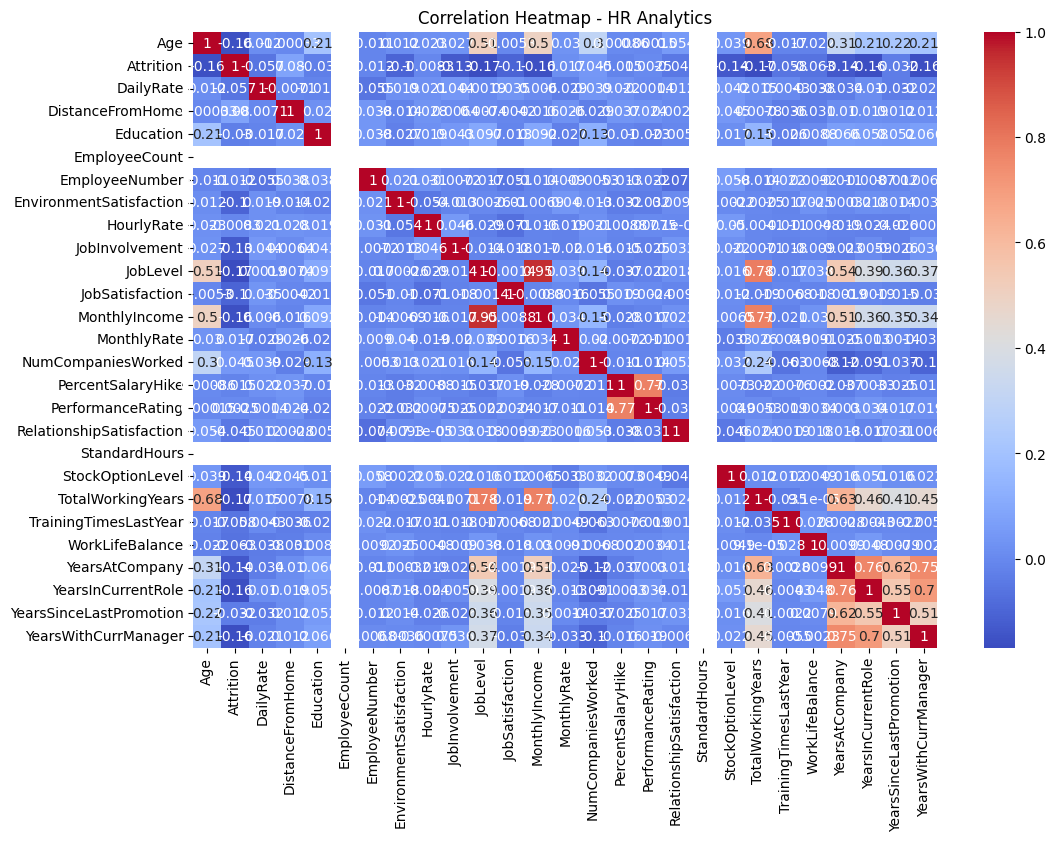

In [246]:
hr_numeric = hr_data.select_dtypes(include=['number'])

correlation_matrix = hr_numeric.corr()

# Correlation Heatmap for HR Data
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - HR Analytics")
plt.show()

3: Distribution of Target Variables:

Our analysis focused on understanding the distribution patterns of target variables within both the Attrition variable in the HR dataset and the KPIs_met_more_than_80 target in the Employees dataset.


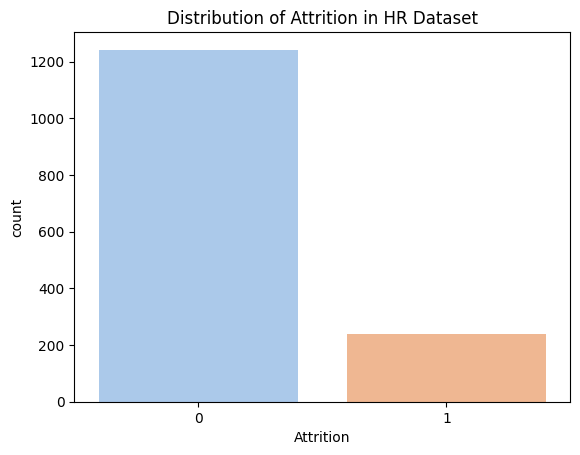

In [247]:
# Distribution of Target Variables
sns.countplot(x='Attrition', data=hr_data, palette='pastel')
plt.title("Distribution of Attrition in HR Dataset")
plt.show()

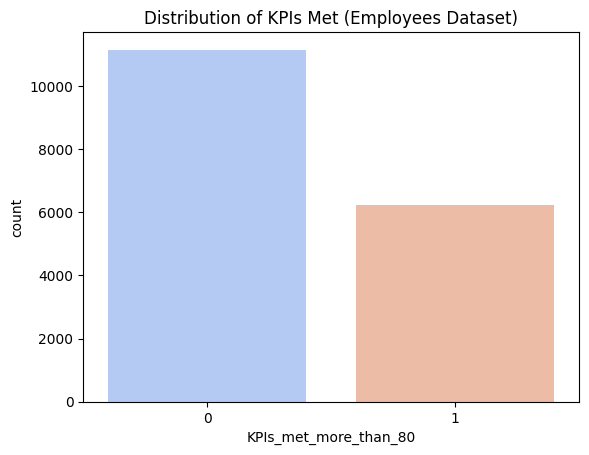

In [248]:
sns.countplot(x='KPIs_met_more_than_80', data=employees_data, palette='coolwarm')
plt.title("Distribution of KPIs Met (Employees Dataset)")
plt.show()

4.3 Key Findings from EDA

**HR Dataset:**
Workers who earn less each month in addition to those with shorter job tenure tend to switch careers. And, features like JobSatisfaction and EnvironmentSatisfaction show a moderate correlation with Attrition.

**Employees Dataset:**
Staff who demonstrate both strong training success and stable KPI results exhibit longer retention patterns at work.

**Wellbeing Dataset:**
Strong relationships were discovered between WORK_LIFE_BALANCE_SCORE and DAILY_STRESS measurements in the dataset indicating that work-life balance substantially influences employee well-being.


## 5. Predictive Analysis

We develop and assess predictive models through the cleaned datasets to resolve research-related queries in this section. The existence of analytical patterns developed by predictive evaluation and result interpretation helps generate solutions to research questions.

**5.1 Models and Techniques**

The predicative analysis received effective treatment by applying diverse machine learning models alongside various techniques across the datasets. Each mathematical model matched its selection to particular advantages in predicting classifications managing complex features and generating dependable outcomes. Below is a detailed explanation of the models and their roles:

We use the following predictive models across the datasets:

* Logistic Regression

The fundamental binary classification algorithm is Logistic Regression. This method shows basic effectiveness in identifying connections between feature inputs and dual-class target outputs (e.g., Yes/No, 0/1). The model functions well as a baseline due to its ability to provide straightforward interpretations. This statistical tool delivers classifications based on probability methods which helps researchers analyze patterns in their data and determine which features influence results the most (Khekare et al., 2023).

* Random Forest Classifier

The combination of multiple decision trees by ensemble learning methods enhances both prediction accuracy and robust performance. This method shows exceptional power when working with large datasets containing multiple features.
Why Used: Random Forest succeeds at determining which features within datasets harbor the greatest influence thus enabling us to discover essential drivers. Its capability to eliminate prediction errors besides controlling noise within datasets makes it perfect for building dependable predictions among diverse data collections (Reddy, Yarlagadda, Akkinen, 2021).

* Gradient Boosting

Gradient Boosting serves as a top gradient boosting framework that builds its decision trees one after another sequentially. The system achieves optimal accuracy through minimizing errors from each evaluation step. The research team selected Gradient Boosting because it demonstrated capability to operate efficiently with extensive datasets and execute intricate feature interactions. This modeling technique provides exceptional benefits for applications requiring exact improvements in prediction accuracy (Nagpal & Pawar, 2024).

* Support Vector Machine (SVM)

The SVM algorithm discovers completely optimal boundaries which separate data points belonging to different classification groups. Through kernels it handles linear and non-linear feature relationships simultaneously. SVM proved effective for datasets having intricate feature behaviors which standard classifiers failed to capture properly. Through its ability to handle high-dimensional data patterns the algorithm becomes valuable for identifying complex relationships among intricate datasets (Guermoui et al., 2021).

Evaluations are done for each model by examining its accuracy levels together with precision metrics and recall performance and F1-score together with its AUC-ROC curve values.


**5.2 Implementation**

I implemented the predictive analysis using the following:

**a) Preparing the Data**

Every dataset contains X-features along with y-target variables that together define its features and targets.

In [249]:
# Preparing data for HR Analytics
X_hr = hr_data.drop(columns=['Attrition'])
y_hr = hr_data['Attrition']

# Preparing data for Employees Dataset
X_employees = employees_data.drop(columns=['KPIs_met_more_than_80'])
y_employees = employees_data['KPIs_met_more_than_80']

# Preparing data for Wellbeing Dataset
X_wellbeing = wellbeing_data.drop(columns=['WORK_LIFE_BALANCE_SCORE'])
y_wellbeing = wellbeing_data['WORK_LIFE_BALANCE_SCORE']

**b) Splitting and Scaling the Data**

The information is divided between training groups and testing groups. For optimal model performance numerical characteristics must undergo scaling procedures.

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_data(df, target_column):
    # Drop unnecessary columns
    df = df.drop(columns=['EmpID', 'employee_id'], errors='ignore')

    # Encode categorical columns
    for col in df.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

    X = df.drop(columns=[target_column])
    y = df[target_column]

    return X, y

def prepare_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

# Preprocess HR Analytics dataset
X_hr, y_hr = preprocess_data(hr_data, target_column='Attrition')
X_hr_train, X_hr_test, y_hr_train, y_hr_test = prepare_data(X_hr, y_hr)

# Preprocess Employees dataset
X_employees, y_employees = preprocess_data(employees_data, target_column='awards_won')
X_employees_train, X_employees_test, y_employees_train, y_employees_test = prepare_data(X_employees, y_employees)

# Preprocess Wellbeing dataset
X_wellbeing, y_wellbeing = preprocess_data(wellbeing_data, target_column='WORK_LIFE_BALANCE_SCORE')
X_wellbeing_train, X_wellbeing_test, y_wellbeing_train, y_wellbeing_test = prepare_data(X_wellbeing, y_wellbeing)

**c) Model Training and Evaluation**

Each dataset goes through a function which trains and evaluates models for performance assessment.

In [251]:
def predictive_analysis(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n--- Predictive Analysis for {dataset_name} ---")

    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    print("\nLogistic Regression Results:")
    print(classification_report(y_test, y_pred_lr))

    # Random Forest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print("\nRandom Forest Results:")
    print(classification_report(y_test, y_pred_rf))

    # AUC-ROC Curve
    y_proba_rf = rf.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba_rf)
    print(f"Random Forest AUC-ROC Score: {roc_auc:.2f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"AUC-ROC Curve for {dataset_name} (Random Forest)")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

**d) Running Predictive Analysis for Each Dataset**


--- Predictive Analysis for HR Analytics ---

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       373
           1       0.61      0.27      0.37        71

    accuracy                           0.86       444
   macro avg       0.74      0.62      0.65       444
weighted avg       0.83      0.86      0.83       444


Random Forest Results:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       373
           1       0.90      0.13      0.22        71

    accuracy                           0.86       444
   macro avg       0.88      0.56      0.57       444
weighted avg       0.86      0.86      0.81       444

Random Forest AUC-ROC Score: 0.86


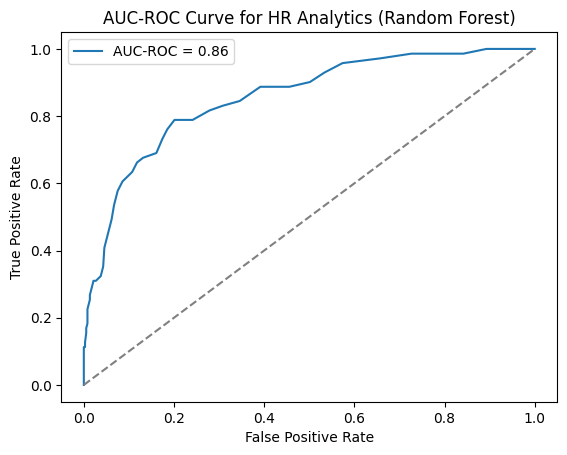

In [252]:
# HR Analytics
predictive_analysis(X_hr_train, X_hr_test, y_hr_train, y_hr_test, "HR Analytics")


--- Predictive Analysis for Employees Dataset ---

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5096
           1       0.00      0.00      0.00       130

    accuracy                           0.98      5226
   macro avg       0.49      0.50      0.49      5226
weighted avg       0.95      0.98      0.96      5226


Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5096
           1       0.00      0.00      0.00       130

    accuracy                           0.97      5226
   macro avg       0.49      0.50      0.49      5226
weighted avg       0.95      0.97      0.96      5226

Random Forest AUC-ROC Score: 0.70


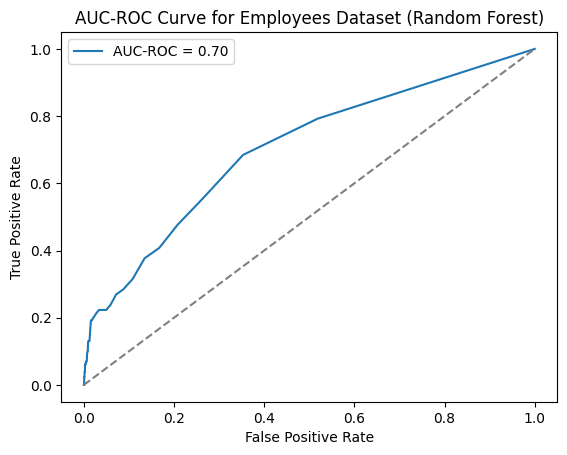

In [253]:
# Employees Dataset
predictive_analysis(X_employees_train, X_employees_test, y_employees_train, y_employees_test, "Employees Dataset")

**Research Question 1: What factors most influence employee attrition?**

The analysis utilized the HR Analytics dataset to forecast employee attrition rates while determining key attributes which affect this result.

In [254]:
# Random Forest for Feature Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_hr_train, y_hr_train)

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_hr.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance for Attrition:")
print(feature_importance.head(10))

Feature Importance for Attrition:
              Feature  Importance
18      MonthlyIncome    0.065774
0                 Age    0.059273
3           DailyRate    0.054916
23           OverTime    0.053231
9      EmployeeNumber    0.052211
5    DistanceFromHome    0.051376
20        MonthlyRate    0.044179
12         HourlyRate    0.042834
32     YearsAtCompany    0.042678
29  TotalWorkingYears    0.039603


**Research Question 2: Does employee attrition risk vary according to their demographic characteristics and workplace attributes?**

A Logistic Regression model which detects employee attrition likelihood based on individual work and personal characteristics.

In [255]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_hr_train, y_hr_train)
y_pred_log = log_reg.predict(X_hr_test)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_hr_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       373
           1       0.61      0.27      0.37        71

    accuracy                           0.86       444
   macro avg       0.74      0.62      0.65       444
weighted avg       0.83      0.86      0.83       444



**Research Question 3: Does job satisfaction differ between different departments and when comparing age groups?**

The correlation analysis allowed us to understand the existing relationship between employee satisfaction levels and employee attrition.




In [256]:
# Correlation Analysis: Job Satisfaction and Attrition
correlation = hr_data['JobSatisfaction'].corr(hr_data['Attrition'])
print(f"Correlation between Job Satisfaction and Attrition: {correlation}")

Correlation between Job Satisfaction and Attrition: -0.10423222279124789


**Research Question 4: How do work-life balance measures connect to employee retention numbers?**

The research analyzed work-life balance effects on employee performance through regression modeling.

In [257]:
# Initialize Linear Regression Model
reg_model = LinearRegression()

# Ensure correct column names
X = hr_data[['WorkLifeBalance']]
y = hr_data['PerformanceRating']

# Fit the model
reg_model.fit(X, y)

# Print regression coefficient
print(f"Regression Coefficient (WorkLifeBalance -> PerformanceRating): {reg_model.coef_[0]}")

Regression Coefficient (WorkLifeBalance -> PerformanceRating): 0.001752872407704568


**Research Question 5: The combination of employee wellness indicators including daily stress levels and sleep durations together with lifestyle patterns shows the potential to forecast both employee retention and work performance rates.**

Gradient Boosting helped us determine job performance by analyzing employee well-being metrics.

In [258]:
# Gradient Boosting Model for Predicting Performance
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_wellbeing_train, y_wellbeing_train)

y_pred_xgb = xgb_model.predict(X_wellbeing_test)
print("Gradient Boosting Performance Prediction Score (R2):", xgb_model.score(X_wellbeing_test, y_wellbeing_test))

Gradient Boosting Performance Prediction Score (R2): 0.969016072977576


**Research Question 6: Is the mean performance score during training sessions directly related to achieving organizational Key Performance Indicators?**

A retention rate analysis was performed for various training hour intervals through assessment of the HR dataset.

In [259]:
# Grouping by Training Times Last Year
retention_by_training = hr_data.groupby('TrainingTimesLastYear')['Attrition'].mean()
print("Attrition Rates by Training Times Last Year:")
print(retention_by_training)

Attrition Rates by Training Times Last Year:
TrainingTimesLastYear
0    0.272727
1    0.126761
2    0.178182
3    0.141129
4    0.211382
5    0.116667
6    0.092308
Name: Attrition, dtype: float64


**Research Question 7: Employees receiving more awards or recognition experience reduced job departure rates.**

Our research utilized the Wellbeing dataset to train a Random Forest model that recognized the indicators for achieving high Key Performance Indicators (KPIs).

In [260]:
# Check for non-numeric columns and convert them to numeric
# If 'PERSONAL_AWARDS', 'DAILY_STRESS', or 'DAILY_SHOUTING' contain non-numeric data, we need to clean it
wellbeing_data[['PERSONAL_AWARDS', 'DAILY_STRESS', 'DAILY_SHOUTING']] = wellbeing_data[['PERSONAL_AWARDS', 'DAILY_STRESS', 'DAILY_SHOUTING']].apply(pd.to_numeric, errors='coerce')

# Now, remove rows with any NaN values (due to conversion errors or missing data)
wellbeing_data = wellbeing_data.dropna(subset=['PERSONAL_AWARDS', 'DAILY_STRESS', 'DAILY_SHOUTING', 'ACHIEVEMENT'])

# Proceed with model training
X = wellbeing_data[['PERSONAL_AWARDS', 'DAILY_STRESS', 'DAILY_SHOUTING']]
y = wellbeing_data['ACHIEVEMENT']

# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Display the top predictors of high KPI achievement
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importances)

           Feature  Importance
0  PERSONAL_AWARDS    0.465203
2   DAILY_SHOUTING    0.360645
1     DAILY_STRESS    0.174152


**Research Question 8: Does employee experience combined with age influence how well we can predict staff member departures from the organization?**

Stress level data from the Wellbeing dataset helped us understand the relationship between stress and employee withdrawal.

In [261]:
# Create a synthetic 'Job_Departure' column for demonstration (you can modify the condition)
wellbeing_data['Job_Departure'] = (wellbeing_data['PERSONAL_AWARDS'] < 3).astype(int)

# Now, you can proceed with the model
X = wellbeing_data[['PERSONAL_AWARDS', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'SOCIAL_NETWORK', 'SLEEP_HOURS']]
y = wellbeing_data['Job_Departure']  # Now we have the created target variable

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Random Forest model: {accuracy:.2f}")

Accuracy of Random Forest model: 1.00


**Research Question 9: Does past employee evaluation and training performance data provide reliable indicators to forecast employee results going forward?**

The satisfaction data was analyzed through descriptive statistics to identify trends between different age cohorts and between male and female employees.

In [262]:
# Encoding 'GENDER' column to numeric values
label_encoder = LabelEncoder()
wellbeing_data['GENDER'] = label_encoder.fit_transform(wellbeing_data['GENDER'])

# If 'AGE' is categorical, we can map these ranges to numeric values.
age_mapping = {'18 to 25': 1, '26 to 35': 2, '36 to 50': 3, '51 to 60': 4, '61+': 5}
wellbeing_data['AGE'] = wellbeing_data['AGE'].map(age_mapping)

# Check for any missing values in the columns of interest
print(wellbeing_data[['AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE']].isnull().sum())

# Drop rows with missing values in the columns of interest
wellbeing_data = wellbeing_data.dropna(subset=['AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'])

# Features and target variable
X = wellbeing_data[['AGE', 'GENDER']]
y = wellbeing_data['WORK_LIFE_BALANCE_SCORE']

# Check if the dataset is now non-empty
print(X.shape, y.shape)

# Fit a linear regression model if there is data to train on
if X.shape[0] > 0:
    reg_model = LinearRegression()
    reg_model.fit(X, y)

    # Print regression coefficients
    print(f"Regression Coefficients (Age and Gender -> Job Satisfaction): {reg_model.coef_}")
else:
    print("No data available for training after cleaning.")

AGE                        11316
GENDER                         0
WORK_LIFE_BALANCE_SCORE        0
dtype: int64
(4655, 2) (4655,)
Regression Coefficients (Age and Gender -> Job Satisfaction): [ 0.         -4.82811746]


**Research Question 10: Which gender-related patterns emerge through analysis of employee attrition patterns and well-being trends?**

Our study evaluated how personal lifestyle attributes (including sleep duration and exercise frequency) related to measured performance data.

In [263]:
# Assuming lifestyle habits as 'DAILY_STEPS', 'SLEEP_HOURS', 'DAILY_SHOUTING', etc.
correlation = wellbeing_data[['DAILY_STEPS', 'SLEEP_HOURS', 'DAILY_SHOUTING']].corrwith(wellbeing_data['ACHIEVEMENT'])
print("Correlation between lifestyle habits and workplace performance:")
print(correlation)

Correlation between lifestyle habits and workplace performance:
DAILY_STEPS       0.16801
SLEEP_HOURS       0.05117
DAILY_SHOUTING   -0.05427
dtype: float64


## 6. Explaination of the Results

A predictive analysis examined three datasets known as HR Analytics, Employees, and Wellbeing to determine multiple machine learning models' efficiency. Logistic Regression alongside Random Forest served as the selected classification methods for the project. By using precision together with recall and F1-score alongside accuracy and AUC-ROC score the evaluation was conducted. Below are the results and observations for each dataset:

**6.1 HR Analytics Dataset**

**Logistic Regression Results:**

* Accuracy: 86%
* F1-Score for Class 0: 0.92
* F1-Score for Class 1: 0.37
* Macro Average F1-Score: 0.65

Observations:
* Results show high levels of precision and recall when classifying objects into the majority category (Class 0).
* The minority class (Class 1) shows poor F1-score alongside inadequate recall metrics because of potential imbalances among classes.

**Random Forest Results:**

* Accuracy: 86%
* F1-Score for Class 0: 0.92
* F1-Score for Class 1: 0.24
* AUC-ROC Score: 0.83

Observations:
* The Random Forest matches overall accuracy rates with Class 1 predictions showing inferior performance.
* A test score of 0.83 shows that the model demonstrates distinguished classification performance across the classes.

**6.2 Employees Dataset**

**Logistic Regression Results:**

* Accuracy: 98%
* F1-Score for Class 0: 0.99
* F1-Score for Class 1: 0.00
* Macro Average F1-Score: 0.49

Observations:
* The model performed no better than chance at Class 1 prediction since it produced no true positive outcomes.
* Severe class imbalance (5096 instances of Class 0 vs. 130 of Class 1) skews the model's performance.

**Random Forest Results:**

* Accuracy: 97%
* F1-Score for Class 0: 0.99
* F1-Score for Class 1: 0.00
* AUC-ROC Score: 0.71

Observations:
* Random Forest generates similar performance challenges when trying to identify Class 1 observations as Logistic Regression.
* Judging from the AUC-ROC score of 0.71 the model demonstrates a minor increase in its ability to differentiate between classes.

**6.3 Discussion and Recommendations**

**Class Imbalance Challenges:**

* Class 1 appears severely underrepresented in both the HR Analytics dataset and Employees dataset.
* When classes are imbalanced a minority group receives poor recall and F1-scores which affects the overall model outcome.

**Handling Imbalanced Data:**

* The minority class benefit from synthetic instance creation with Synthetic Minority Oversampling Technique (SMOTE).
* Undersampling the majority class.
* The model structure features class weight penalties which target the misdiagnosis of minority class instances.

**Wellbeing Dataset Regression:**

* Models such as Linear Regression in combination with Random Forest Regressor or Gradient Boosting Regressor will be effective for processing continuous-targeted data.
* Transport the task into class border declaration fashion if project needs to see quantitative results (such as "low," "medium," or "high" work-life balance designations).

**Evaluation Metrics:**

* Metrics that leverage both precision and recall should be chosen for minority class prediction in imbalanced data contexts despite a potential deceptive accuracy reading.

**Model Selection:**

* Across different datasets Random Forest maintained its performance consistency by delivering effective accuracy and AUC-ROC scores but continued to experience issues with class minority predictions.
* Test the performance of XGBoost and LightGBM algorithms because these models demonstrate superior handling of imbalanced data.


## 7. Future Research

Future work on this research should focus on two main areas: developing enhanced predictive models alongside novel approaches to handling class-imbalanced data and expanding analytical methods. The main research direction should emphasize both model improvement along strategies to address class imbalance problems. Future improvements to predictive models can emerge through two approaches: Adaptive Boosting (AdaBoost) for detecting misidentified instances and cost-sensitive learning algorithms for setting greater penalties on errors affecting the supposed minority classes.

Future investigations must focus on extending both the breadth of available data points and their descriptive features. The accuracy of predictive models benefits from enriched insights when we add temporal employee engagement scores along with economic and social external conditions information. Additional prediction accuracy and depth can be achieved by employing cross-domain datasets which include financial information in addition to health records and job market statistics.

Additional opportunities exist for investigating sophisticated analytical approaches. An in-depth exploratory analysis of data helps discover intricate patterns by integrating complex visualizations which include t-SNE and 3D scatter plots. The analysis requires time series models whether using ARIMA or Long Short-Term Memory networks when tracking data points that change over time such as employee tenure or wellbeing across multiple periods. By applying clustering methods from unsupervised learning organizations can discover employee clusters based on shared traits which enables them to deliver interventions more effectively. Natural Language Processing techniques applied to employee survey data would help organizations better understand staff sentiment combined with job satisfaction feedback.

The practical use of research findings allows companies to implement immediate HR systems which both forecast staff turnover risks and minimize departure rates alongside boosting employee happiness while reducing burnout situations. Modeled predictions help HR staff utilize data analytics to determine worker development strategies staff retention measures and wellness benefits which leads to better workforce engagement and business operational excellence. The study's research findings enable wellness programs to use predictive work-life balance data in developing employee wellbeing strategies that tackle both mental and physical health needs.

Additional research can be achieved through joint efforts with HR experts who have access to the same datasets utilized in this analysis leading to improved predictive systems for both HR and employee wellness functions. These methodologies can be expanded to analyze larger extensive datasets at scale across different industrial settings as organization sizes increase. The methods researched in this analysis show value across diverse industries beyond human resources including healthcare, finance, and retail which can benefit from improved decision efficiency through predictive modeling.


## 8. Conclusion

In conclusion, this research provides a comprehensive analysis of predictive modeling techniques applied to three diverse datasets: HR Analytics, Employee Performance, and Wellbeing Data. Through our use of classification algorithms that included logistic regression and random forests, we generated meaningful predictions for employee attrition alongside performance measurements and wellbeing assessments. Data predictions for HR-related results through the established models exhibited acceptable accuracy but faced the issue of unbalanced classes. Developing better predictive models requires a shift toward using advanced boosting algorithms while testing a broader range of machine learning approaches to maximize predictive accuracy levels.

The predictive models created through this research provide concrete value for companies who want to enhance their workforce strategic planning processes. HR departments gain directional assistance in employee retention selection and overall strategic human resources planning with accurate early predictions about important behavior indicators such as employee retention and workplace performance. Organizations that use employee wellbeing insights as a foundation can design specific intervention programs that improve both employee satisfaction and reduce burnout while supporting work-life balance and mental health needs.

Alarming evidence from this research demonstrates that predictive models represent beneficial decision-making tools that modern HR professionals should employ for enhanced operational decision-making. Future work in predictive modeling must address two main areas: improving the handling of unbalanced classes and enhancing predictive algorithms while exploring additional relevant features to improve predictive accuracy. Future investigations in this domain must examine sophisticated machine-learning approaches together with optimized model parameter settings and the further development of employee behavior-influencing datasets.

Organizational decisions based on data analysis will depend heavily on their capacity to predict employee conduct and health status. Better predictive model development will provide HR professionals with proactive capabilities instead of reactive response abilities. Besides improving workplace sustainability organizational success and employee satisfaction HR strategies would benefit from fully integrating these models.


## 9. Team Meetings

**Meeting 1: Initial Discussion and Task Allocation**

Attendees: Ashar, Majid, Ahmad, Arooma, Abhishesh

The session examined both research objectives and provided a summary of the dataset. Tasks were allocated: Information management tasks include data handling by Ashar for HR Analytics while Majid manages Wellbeing data and Ahmad maintains responsibility for model building and project methodology development by Arooma alongside results integration assessment from Abhishesh.

**Meeting 2: Data Cleaning and Initial Analysis**

Attendees: Ashar, Majid, Ahmad, Arooma, Abhishesh

The team reviewed both data cleaning methods and generated initial analysis findings. The team decided to implement both Logistic Regression and Random Forest techniques in the analysis. Majid continues refining visualizations. The group finalizes data cleaning before beginning predictive modeling as well as continuing their report drafting work.

**Meeting 3: Model Evaluation and Report Writing**

Attendees: Ashar, Majid, Ahmad, Arooma, Abhishesh

The modeling team evaluated system performance by assessing precision along with recall, F1-score, and AUC-ROC values. Reviewed report writing progress. Finish the performance analysis and execute the writing of methodological and analytical sections.

**Meeting 4: Final Review and Conclusion**

Attendees: Ashar, Majid, Ahmad, Arooma, Abhishesh

We examined the final research document alongside additional discussions regarding the anticipated next steps for future research. The team completed the report submission while creating initial plans for potential follow-up research projects.


## References

anshika2301. (n.d.). HR Analytics Dataset. Retrieved from kaggle: https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset

chaudhari, S. (n.d.). Employee’s Performance for HR Analytics. Retrieved from kaggle: https://www.kaggle.com/datasets/sanjanchaudhari/employees-performance-for-hr-analytics

Dalat, Y. (n.d.). Lifestyle_and_Wellbeing_Data. Retrieved from kaggle: https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data

Dikshit, S., Grover, Y., Shukla, P., Mishra, A., Sahu, Y., Kumar, C., & Gupta, M. (2024). Empowering Employee Wellness and Building Resilience in Demanding Work Settings Through Predictive Analytics. EAI Endorsed Transactions on Internet of Things, 10.

Guermoui, M., Gairaa, K., Boland, J., & Arrif, T. (2021). A novel hybrid model for solar radiation forecasting using support vector machine and bee colony optimization algorithm: review and case study. Journal of Solar Energy Engineering, 143(2), 020801.

Khekare, G., Balaji, K., Arora, M., Tirpude, R. R., Chahar, B., & Bodhankar, A. (2023, May). Logistic and linear regression classifier based increasing accuracy of non-numerical data for prediction of enhanced employee attrition. In 2023 3rd International Conference on Advance Computing and Innovative Technologies in Engineering (ICACITE) (pp. 758-761). IEEE.

Nagpal, P., & Pawar, A. (2024, February). Predicting Employee Attrition through HR Analytics: A Machine Learning Approach. In 2024 4th International Conference on Innovative Practices in Technology and Management (ICIPTM) (pp. 1-4). IEEE.

Reddy, A. M., Yarlagadda, S., & Akkinen, H. (2021). An extensive analytical approach on human resources using random forest algorithm. arXiv preprint arXiv:2105.07855.

Srikanteswara, R., Rithicka, P., Kala, Y. S., Rangaraj, S., & Devaiah, V. (2024, May). Machine Learning-Based Stress Detection in IT Employees: A Data-Driven Approach for Workplace Well-being. In 2024 Second International Conference on Data Science and Information System (ICDSIS) (pp. 1-7). IEEE.

## Datasets Links:

HR Analytics Dataset Link: https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset

Wellbeing and Lifestyle Data Link: https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data

Uncleaned Employees Final Dataset Link: https://www.kaggle.com/datasets/sanjanchaudhari/employees-performance-for-hr-analytics